In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv(r"C:\Users\DELL\Downloads\autos.csv")
datac=data.copy()

In [4]:
datac

dateCrawled                                          name  \
0       2016-03-24 11:52:17                                    Golf_3_1.6   
1       2016-03-24 10:58:45                          A5_Sportback_2.7_Tdi   
2       2016-03-14 12:52:21                Jeep_Grand_Cherokee_"Overland"   
3       2016-03-17 16:54:04                            GOLF_4_1_4__3TÜRER   
4       2016-03-31 17:25:20                Skoda_Fabia_1.4_TDI_PD_Classic   
...                     ...                                           ...   
371523  2016-03-14 17:48:27                    Suche_t4___vito_ab_6_sitze   
371524  2016-03-05 19:56:21         Smart_smart_leistungssteigerung_100ps   
371525  2016-03-19 18:57:12            Volkswagen_Multivan_T4_TDI_7DC_UY2   
371526  2016-03-20 19:41:08                        VW_Golf_Kombi_1_9l_TDI   
371527  2016-03-07 19:39:19  BMW_M135i_vollausgestattet_NP_52.720____Euro   

        seller offerType  price   abtest vehicleType  yearOfRegistration  \
0       privat   Angebot    480     test         NaN                1993   
1       privat   Angebot  18300     test       coupe                2011   
2       privat   Angebot   9800     test         suv                2004   
3       privat   Angebot   1500     test  kleinwagen                2001   
4       privat   Angebot   3600     test  kleinwagen                2008   
...        ...       ...    ...      ...         ...                 ...   
371523  privat   Angebot   2200     test         NaN                2005   
371524  privat   Angebot   1199     test      cabrio                2000   
371525  privat   Angebot   9200     test         bus                1996   
371526  privat   Angebot   3400     test       kombi                2002   
371527  privat   Angebot  28990  control   limousine                2013   

          gearbox  powerPS        model  kilometer  monthOfRegistration  \
0         manuell        0         golf     150000                    0   
1         manuell      190          NaN     125000                    5   
2       automatik      163        grand     125000                    8   
3         manuell       75         golf     150000                    6   
4         manuell       69        fabia      90000                    7   
...           ...      ...          ...        ...                  ...   
371523        NaN        0          NaN      20000                    1   
371524  automatik      101       fortwo     125000                    3   
371525    manuell      102  transporter     150000                    3   
371526    manuell      100         golf     150000                    6   
371527    manuell      320      m_reihe      50000                    8   

       fuelType           brand notRepairedDamage          dateCreated  \
0        benzin      volkswagen               NaN  2016-03-24 00:00:00   
1        diesel            audi                ja  2016-03-24 00:00:00   
2        diesel            jeep               NaN  2016-03-14 00:00:00   
3        benzin      volkswagen              nein  2016-03-17 00:00:00   
4        diesel           skoda              nein  2016-03-31 00:00:00   
...         ...             ...               ...                  ...   
371523      NaN  sonstige_autos               NaN  2016-03-14 00:00:00   
371524   benzin           smart              nein  2016-03-05 00:00:00   
371525   diesel      volkswagen              nein  2016-03-19 00:00:00   
371526   diesel      volkswagen               NaN  2016-03-20 00:00:00   
371527   benzin             bmw              nein  2016-03-07 00:00:00   

        nrOfPictures  postalCode             lastSeen  
0                  0       70435  2016-04-07 03:16:57  
1                  0       66954  2016-04-07 01:46:50  
2                  0       90480  2016-04-05 12:47:46  
3                  0       91074  2016-03-17 17:40:17  
4                  0       60437  2016-04-06 10:17:21  
...              ...         ...                  ..

In [5]:
## 1.Perform general Data analysis

In [6]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [7]:
datac["dateCrawled"]=pd.to_datetime(datac["dateCrawled"])
datac["dateCreated"]=pd.to_datetime(datac["dateCreated"])
datac["lastSeen"]=pd.to_datetime(datac["lastSeen"])

In [8]:
datac.fillna({"notRepairedDamage":datac["notRepairedDamage"].mode()[0],"fuelType":datac["fuelType"].mode()[0],"vehicleType":datac["vehicleType"].mode()[0],"gearbox":datac["gearbox"].mode()[0],"model":datac["model"].mode()[0]})

dateCrawled                                          name  \
0      2016-03-24 11:52:17                                    Golf_3_1.6   
1      2016-03-24 10:58:45                          A5_Sportback_2.7_Tdi   
2      2016-03-14 12:52:21                Jeep_Grand_Cherokee_"Overland"   
3      2016-03-17 16:54:04                            GOLF_4_1_4__3TÜRER   
4      2016-03-31 17:25:20                Skoda_Fabia_1.4_TDI_PD_Classic   
...                    ...                                           ...   
371523 2016-03-14 17:48:27                    Suche_t4___vito_ab_6_sitze   
371524 2016-03-05 19:56:21         Smart_smart_leistungssteigerung_100ps   
371525 2016-03-19 18:57:12            Volkswagen_Multivan_T4_TDI_7DC_UY2   
371526 2016-03-20 19:41:08                        VW_Golf_Kombi_1_9l_TDI   
371527 2016-03-07 19:39:19  BMW_M135i_vollausgestattet_NP_52.720____Euro   

        seller offerType  price   abtest vehicleType  yearOfRegistration  \
0       privat   Angebot    480     test   limousine                1993   
1       privat   Angebot  18300     test       coupe                2011   
2       privat   Angebot   9800     test         suv                2004   
3       privat   Angebot   1500     test  kleinwagen                2001   
4       privat   Angebot   3600     test  kleinwagen                2008   
...        ...       ...    ...      ...         ...                 ...   
371523  privat   Angebot   2200     test   limousine                2005   
371524  privat   Angebot   1199     test      cabrio                2000   
371525  privat   Angebot   9200     test         bus                1996   
371526  privat   Angebot   3400     test       kombi                2002   
371527  privat   Angebot  28990  control   limousine                2013   

          gearbox  powerPS        model  kilometer  monthOfRegistration  \
0         manuell        0         golf     150000                    0   
1         manuell      190         golf     125000                    5   
2       automatik      163        grand     125000                    8   
3         manuell       75         golf     150000                    6   
4         manuell       69        fabia      90000                    7   
...           ...      ...          ...        ...                  ...   
371523    manuell        0         golf      20000                    1   
371524  automatik      101       fortwo     125000                    3   
371525    manuell      102  transporter     150000                    3   
371526    manuell      100         golf     150000                    6   
371527    manuell      320      m_reihe      50000                    8   

       fuelType           brand notRepairedDamage dateCreated  nrOfPictures  \
0        benzin      volkswagen              nein  2016-03-24             0   
1        diesel            audi                ja  2016-03-24             0   
2        diesel            jeep              nein  2016-03-14             0   
3        benzin      volkswagen              nein  2016-03-17             0   
4        diesel           skoda              nein  2016-03-31             0   
...         ...             ...               ...         ...           ...   
371523   benzin  sonstige_autos              nein  2016-03-14             0   
371524   benzin           smart              nein  2016-03-05             0   
371525   diesel      volkswagen              nein  2016-03-19             0   
371526   diesel      volkswagen              nein  2016-03-20             0   
371527   benzin             bmw              nein  2016-03-07             0   

        postalCode            lastSeen  
0            70435 2016-04-07 03:16:57  
1            66954 2016-04-07 01:46:50  
2            90480 2016-04-05 12:47:46  
3            91074 2016-03-17 17:40:17  
4            60437 2016-04-06 10:17:21  
...            ...                 ...  
371523       39576 2016-04-06 00:46:52  
371524     

In [ ]:
mode()[0],"model":data

In [9]:
datac.drop_duplicates(inplace=True)
datac.drop(["nrOfPictures"],axis=1,inplace=True)
datac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371524 entries, 0 to 371527
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          371524 non-null  datetime64[ns]
 1   name                 371524 non-null  object        
 2   seller               371524 non-null  object        
 3   offerType            371524 non-null  object        
 4   price                371524 non-null  int64         
 5   abtest               371524 non-null  object        
 6   vehicleType          333655 non-null  object        
 7   yearOfRegistration   371524 non-null  int64         
 8   gearbox              351315 non-null  object        
 9   powerPS              371524 non-null  int64         
 10  model                351040 non-null  object        
 11  kilometer            371524 non-null  int64         
 12  monthOfRegistration  371524 non-null  int64         
 13  fuelType      

In [10]:
# 2)Can you tell me the Distribution of Vehicles based on Year of Registration with the help of a plot


In [11]:
datac["yearOfRegistration"]=datac["yearOfRegistration"].where((datac["yearOfRegistration"]>=1950) & (datac["yearOfRegistration"]<=2023),datac["yearOfRegistration"].mode()[0])


In [12]:
datac["yearOfRegistration"].value_counts()

2000    24954
1999    22766
2005    22316
2006    20230
2001    20217
        ...  
1950       22
1951       19
1953       18
1954       16
1952       12
Name: yearOfRegistration, Length: 70, dtype: int64

In [13]:
plt.figure(figsize=(20, 10))
sns.histplot(data=datac, x=datac["yearOfRegistration"])
plt.title("Distribution of Vehicles by Year of Registration")
plt.grid(axis='y', linestyle='--')
plt.show()

In [14]:
#3) Create a plot based on the Variation of the price range by the vehicle type

In [15]:
datac.groupby("vehicleType")["price"].agg(['mean', 'median', 'std', 'min', 'max'])

mean   median           std  min         max
vehicleType                                                       
andere       677328.957700   2299.0  3.710417e+07    0  2147483647
bus           10302.742956   4500.0  5.783239e+05    0    99999999
cabrio        15066.444013   6400.0  6.610357e+05    0    99999999
coupe         25964.071214   5250.0  1.040471e+06    0    99999999
kleinwagen     5694.287796   1500.0  5.056026e+05    0    99999999
kombi          7741.302399   3400.0  3.915659e+05    0    99999999
limousine     11116.186404   3200.0  6.626298e+05    0    99999999
suv           13242.822397  10500.0  1.626879e+04    0     1000000

In [16]:
plt.figure(figsize=(20, 10))
sns.barplot(data=datac, x=datac["vehicleType"],y=datac["price"])
plt.title("Variation of the price range by the vehicle type")
plt.grid(axis='y', linestyle='--')
plt.show()


In [17]:
#4) Find out Total count of vehicles by type available on ebay for sale.As well as create a visualization for the client

In [18]:
datac["vehicleType"].value_counts()

limousine     95894
kleinwagen    80022
kombi         67563
bus           30201
cabrio        22898
coupe         19013
suv           14707
andere         3357
Name: vehicleType, dtype: int64

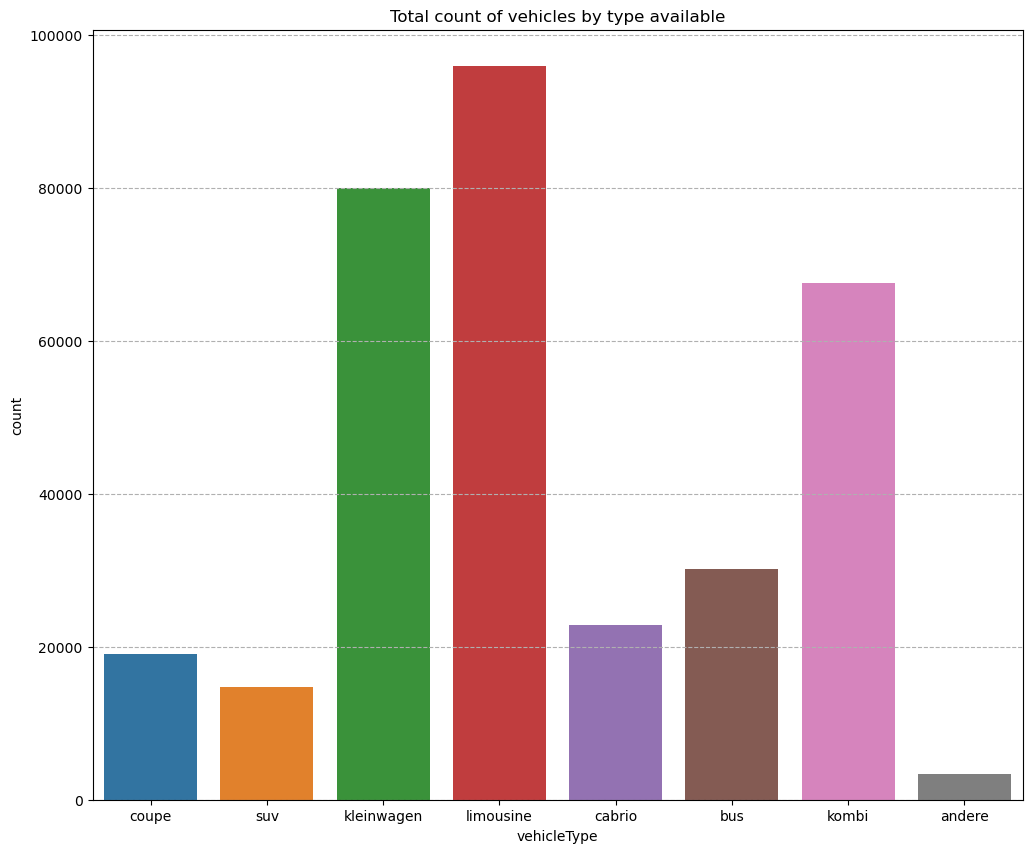

In [19]:
plt.figure(figsize=(12, 10))
sns.countplot(x=datac["vehicleType"])
plt.title("Total count of vehicles by type available")
plt.grid(axis='y', linestyle='--')
plt.show()

In [20]:
# 5) Is there any relationship between dollar_price and kilometer? (Explain with appropriate analysis)

In [21]:
datac[["price","kilometer"]].corr(method="spearman")

price  kilometer
price      1.00000   -0.37305
kilometer -0.37305    1.00000

In [22]:
sns.heatmap(datac[["price","kilometer"]].corr(method="spearman"),annot=True,fmt='.3g')

<Axes: >

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(datac["kilometer"],datac["price"], c='b', marker='o', label='Cars')
plt.title("Scatter Plot of Price vs. Kilometers")
plt.xlabel("Kilometers")
plt.ylabel("Price (Dollars)")
plt.legend()
plt.grid(True)
plt.show()

In [24]:
#1) Can you tell me No of Vehicles by Brand Available on ebay for sale with the help of visualization

In [25]:
datac["brand"].value_counts()

volkswagen        79639
bmw               40274
opel              40136
mercedes_benz     35307
audi              32873
ford              25573
renault           17969
peugeot           11027
fiat               9676
seat               7022
mazda              5695
skoda              5641
smart              5249
citroen            5182
nissan             5037
toyota             4694
sonstige_autos     3982
hyundai            3646
mini               3394
volvo              3327
mitsubishi         3061
honda              2836
kia                2555
alfa_romeo         2345
suzuki             2327
porsche            2215
chevrolet          1845
chrysler           1452
dacia               900
jeep                807
daihatsu            806
subaru              779
land_rover          770
jaguar              621
trabant             591
daewoo              542
saab                530
rover               490
lancia              484
lada                225
Name: brand, dtype: int64

In [26]:
plt.figure(figsize=(20, 14))
sns.countplot(y=datac["brand"])
plt.title("No of Vehicles by Brand Available")
plt.grid(axis='x', linestyle='--')
plt.show()


In [27]:
# 2) What is the Average price for vehicles based on the type of vehicle as well as on the type of gearbox.Explain me with both numerical and visualization analysis

In [28]:
datax=datac.groupby(["vehicleType","gearbox"])
datax["price"].mean()

vehicleType  gearbox  
andere       automatik      7366.861496
             manuell      825539.352000
bus          automatik     10599.265713
             manuell        6321.168265
cabrio       automatik     16254.374208
             manuell       14897.823880
coupe        automatik     35510.948175
             manuell       12400.255031
kleinwagen   automatik      3889.552200
             manuell        4606.803784
kombi        automatik      8910.045892
             manuell        7464.741491
limousine    automatik     19004.102243
             manuell        8505.151711
suv          automatik     16764.091774
             manuell       10040.553599
Name: price, dtype: float64

In [29]:
plt.figure(figsize=(12, 6))
(datax["price"].mean()).plot(kind="bar")
plt.title("Average price for vehicles based on the vehicle type and gearbox type")
plt.grid(axis='y', linestyle='--')
plt.show()

In [30]:
#3) What is the marginal probability of private seller

In [31]:
pd.crosstab(index=(datac["seller"]=="privat"),columns=(datac["seller"]=="gewerblich"),margins=True, normalize="all")

seller     False      True       All
seller                              
False   0.000000  0.000008  0.000008
True    0.999992  0.000000  0.999992
All     0.999992  0.000008  1.000000

In [32]:
#1) The memory usage of the data is around 6.1 mb.How can we reduce the memory usage of the data set?

In [33]:
datac.drop(["dateCrawled","postalCode","lastSeen"],axis=1,inplace=True)

In [34]:
datac["kilometer"]=datac["kilometer"].astype(np.int32)
datac["yearOfRegistration"]=datac["yearOfRegistration"].astype(np.int16)
datac["powerPS"]=datac["powerPS"].astype(np.int16)
datac["price"]=datac["price"].astype(np.int32)
datac["monthOfRegistration"]=datac["monthOfRegistration"].astype(np.int8)

In [35]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371524 entries, 0 to 371527
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   name                 371524 non-null  object        
 1   seller               371524 non-null  object        
 2   offerType            371524 non-null  object        
 3   price                371524 non-null  int32         
 4   abtest               371524 non-null  object        
 5   vehicleType          333655 non-null  object        
 6   yearOfRegistration   371524 non-null  int16         
 7   gearbox              351315 non-null  object        
 8   powerPS              371524 non-null  int16         
 9   model                351040 non-null  object        
 10  kilometer            371524 non-null  int32         
 11  monthOfRegistration  371524 non-null  int8          
 12  fuelType             338138 non-null  object        
 13  brand         

In [36]:
#2) What is the Average price of vehicle by fuel type and gearbox type.Give a plot

In [37]:
datay=datac.groupby(["fuelType","gearbox"])
datay["price"].mean()

fuelType  gearbox  
andere    automatik    8.434172e+03
          manuell      1.732090e+07
benzin    automatik    1.224912e+04
          manuell      6.567152e+03
cng       automatik    6.737718e+03
          manuell      4.572039e+03
diesel    automatik    1.881035e+04
          manuell      7.326334e+03
elektro   automatik    2.290028e+04
          manuell      3.384615e+03
hybrid    automatik    1.528196e+04
          manuell      1.201370e+04
lpg       automatik    2.219599e+04
          manuell      3.255393e+03
Name: price, dtype: float64

In [38]:
plt.figure(figsize=(12, 6))
(datay["price"].mean()).plot(kind="bar")
plt.title("Average price of vehicle by fuel type and gearbox type")
plt.grid(axis='y', linestyle='--')
plt.show()

In [39]:
# 3) What is the Average power of a vehicle by vehicle type and gearbox type.Give a plot

In [40]:
datax["powerPS"].mean()

vehicleType  gearbox  
andere       automatik    124.922438
             manuell      100.026545
bus          automatik    140.884166
             manuell      110.328334
cabrio       automatik    188.922414
             manuell      133.495202
coupe        automatik    218.723713
             manuell      154.581977
kleinwagen   automatik     75.040381
             manuell       69.628014
kombi        automatik    174.859625
             manuell      125.260903
limousine    automatik    182.454155
             manuell      117.023218
suv          automatik    210.521964
             manuell      127.734295
Name: powerPS, dtype: float64

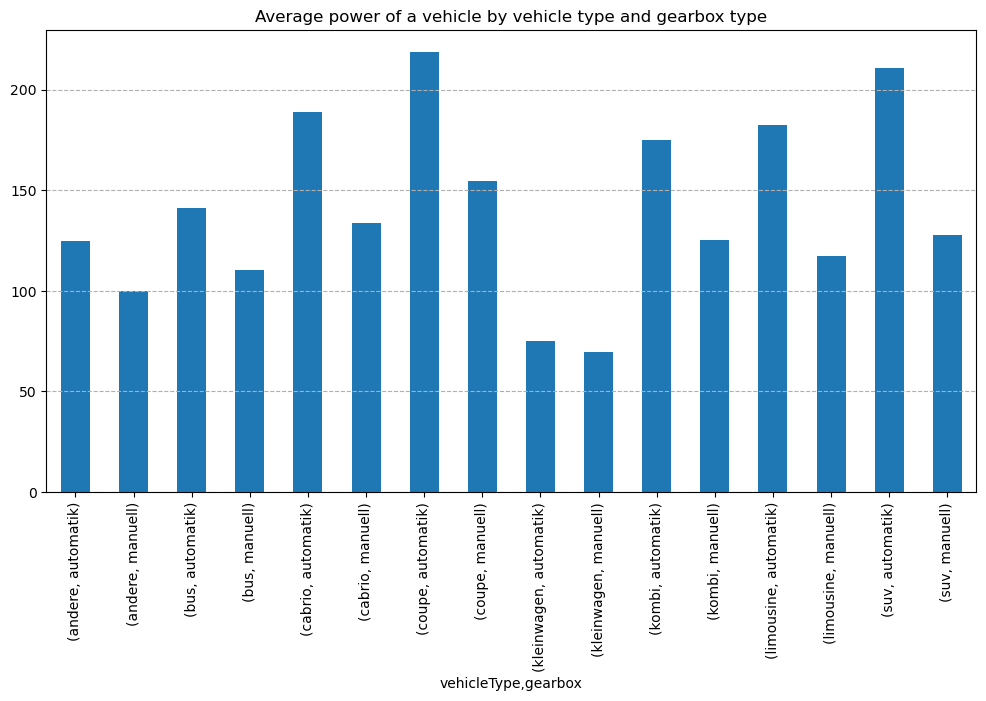

In [41]:
plt.figure(figsize=(12, 6))
(datax["powerPS"].mean()).plot(kind="bar")
plt.title("Average power of a vehicle by vehicle type and gearbox type")
plt.grid(axis='y', linestyle='--')
plt.show()

In [42]:
# 4) What is the Average price of a vehicle by brand as well as vehicle type.Use heatmap to explain this

In [43]:
dataz=datac.groupby(["brand","vehicleType"])
dataz["price"].mean()

brand       vehicleType
alfa_romeo  andere          3153.333333
            cabrio          9147.179487
            coupe           6897.190083
            kleinwagen      4466.242678
            kombi           3580.161926
                               ...     
volvo       coupe           6040.930556
            kleinwagen      3912.714286
            kombi           3583.711310
            limousine       5071.679878
            suv            15269.577465
Name: price, Length: 296, dtype: float64

In [44]:
pd.crosstab(index=datac["brand"],columns=datac["vehicleType"],values=datac["price"],aggfunc=["mean"])

mean                                             \
vehicleType           andere           bus        cabrio          coupe   
brand                                                                     
alfa_romeo      3.153333e+03           NaN   9147.179487    6897.190083   
audi            9.768120e+04   3485.000000  13441.196564   16341.915486   
bmw             2.686439e+03  27569.884615  38010.594552   32097.647113   
chevrolet       1.003280e+04   6189.300000  24026.621622   16317.023438   
chrysler        8.888333e+03   2630.515982   4324.531120    9174.240000   
citroen         3.521024e+03   4409.132179   4536.408696    2695.552632   
dacia           4.450000e+03   8606.700000           NaN            NaN   
daewoo          9.938000e+02   1262.777778    900.000000     428.625000   
daihatsu        1.075000e+03   1201.500000   7761.000000            NaN   
fiat            3.534768e+03   4014.823460   6485.634286    3801.477778   
ford            4.089282e+03   6028.413458   5471.103125    8217.211306   
honda           2.417000e+03   4551.638554   5336.653846    3065.749380   
hyundai         3.435571e+03   4886.926923    550.000000    4887.628440   
jaguar                   NaN           NaN  51938.769231   35811.528302   
jeep            1.265000e+04   7000.000000   1350.000000            NaN   
kia             3.459040e+03   3627.381643  10000.000000    6387.666667   
lada            3.925000e+03   3500.000000   2500.000000            NaN   
lancia                   NaN   5204.721311  12305.000000    6341.642857   
land_rover      7.280000e+03           NaN   2675.000000            NaN   
mazda           1.798649e+03  18289.727666   5514.914376    3165.441606   
mercedes_benz   8.831185e+03  44828.192226  16172.390235   42447.124020   
mini            6.581750e+03   7616.666667  13406.804845    9165.601562   
mitsubishi      1.913393e+03   1847.366667   5265.808824    3035.977011   
nissan          5.936548e+03   4388.672956   8907.562500   10382.306878   
opel            2.661027e+03   4403.927122   4412.565111    3365.917308   
peugeot         3.210180e+03   5080.614583   4571.136795    6761.004219   
porsche         5.107222e+04           NaN  41906.407674   78019.667939   
renault         2.884414e+03   3087.959809   4133.158126    6038.820937   
rover           2.818250e+03    450.000000   3074.102564     738.375000   
saab            1.433000e+03           NaN   5825.612903    2385.863636   
seat            2.766378e+03   7063.063830           NaN    5551.677778   
skoda           4.706077e+03   6649.809524   7722.500000    3533.000000   
smart           3.186667e+03   1650.000000   4673.917917    3851.677419   
sonstige_autos  8.047562e+06   5248.336585  27003.938735  104686.461883   
subaru          2.616667e+03   3557.764706   8900.000000   10418.625000   
suzuki          3.598571e+03   1767.464286   2309.361111    3252.500000   
toyota          5.477727e+03   6261.194690   5771.323077    5341.879032   
trabant         2.697000e+03           NaN   5799.486486    3275.000000   
volkswagen      1.329010e+05   9237.313188   6548.038610   14854.182493   
volvo           1.364000e+04           NaN  10665.802469    6040.930556   

                                                                         
vehicleType        kleinwagen         kombi     limousine           suv  
brand                                                                    
alfa_romeo        4466.242678   3580.161926   3067.774841      0.000000  
audi              7358.435834  17069.568857  16238.554551  24599.234542  
bmw               4432.658696   9001.496376   9613.617946  15924.963470  
chevrolet         3029.557461   4899.090090   5452.099567   9830.491228  
chrysler          3124.833333   4867.845528   4173.444444   5888.391304  
citroen           3029.278894   3724.929022  41831.889959  10810.540541  
dacia             4878.726457   4166.642857   3359.990291   9761.972093  
daewoo            1110.324627    816.340426    983.981308 

In [46]:
average_price=pd.DataFrame(pd.crosstab(index=datac["brand"],columns=datac["vehicleType"],values=datac["price"],aggfunc=["mean"]))
average_price.fillna(0,inplace=True)
average_price

mean                                             \
vehicleType           andere           bus        cabrio          coupe   
brand                                                                     
alfa_romeo      3.153333e+03      0.000000   9147.179487    6897.190083   
audi            9.768120e+04   3485.000000  13441.196564   16341.915486   
bmw             2.686439e+03  27569.884615  38010.594552   32097.647113   
chevrolet       1.003280e+04   6189.300000  24026.621622   16317.023438   
chrysler        8.888333e+03   2630.515982   4324.531120    9174.240000   
citroen         3.521024e+03   4409.132179   4536.408696    2695.552632   
dacia           4.450000e+03   8606.700000      0.000000       0.000000   
daewoo          9.938000e+02   1262.777778    900.000000     428.625000   
daihatsu        1.075000e+03   1201.500000   7761.000000       0.000000   
fiat            3.534768e+03   4014.823460   6485.634286    3801.477778   
ford            4.089282e+03   6028.413458   5471.103125    8217.211306   
honda           2.417000e+03   4551.638554   5336.653846    3065.749380   
hyundai         3.435571e+03   4886.926923    550.000000    4887.628440   
jaguar          0.000000e+00      0.000000  51938.769231   35811.528302   
jeep            1.265000e+04   7000.000000   1350.000000       0.000000   
kia             3.459040e+03   3627.381643  10000.000000    6387.666667   
lada            3.925000e+03   3500.000000   2500.000000       0.000000   
lancia          0.000000e+00   5204.721311  12305.000000    6341.642857   
land_rover      7.280000e+03      0.000000   2675.000000       0.000000   
mazda           1.798649e+03  18289.727666   5514.914376    3165.441606   
mercedes_benz   8.831185e+03  44828.192226  16172.390235   42447.124020   
mini            6.581750e+03   7616.666667  13406.804845    9165.601562   
mitsubishi      1.913393e+03   1847.366667   5265.808824    3035.977011   
nissan          5.936548e+03   4388.672956   8907.562500   10382.306878   
opel            2.661027e+03   4403.927122   4412.565111    3365.917308   
peugeot         3.210180e+03   5080.614583   4571.136795    6761.004219   
porsche         5.107222e+04      0.000000  41906.407674   78019.667939   
renault         2.884414e+03   3087.959809   4133.158126    6038.820937   
rover           2.818250e+03    450.000000   3074.102564     738.375000   
saab            1.433000e+03      0.000000   5825.612903    2385.863636   
seat            2.766378e+03   7063.063830      0.000000    5551.677778   
skoda           4.706077e+03   6649.809524   7722.500000    3533.000000   
smart           3.186667e+03   1650.000000   4673.917917    3851.677419   
sonstige_autos  8.047562e+06   5248.336585  27003.938735  104686.461883   
subaru          2.616667e+03   3557.764706   8900.000000   10418.625000   
suzuki          3.598571e+03   1767.464286   2309.361111    3252.500000   
toyota          5.477727e+03   6261.194690   5771.323077    5341.879032   
trabant         2.697000e+03      0.000000   5799.486486    3275.000000   
volkswagen      1.329010e+05   9237.313188   6548.038610   14854.182493   
volvo           1.364000e+04      0.000000  10665.802469    6040.930556   

                                                                         
vehicleType        kleinwagen         kombi     limousine           suv  
brand                                                                    
alfa_romeo        4466.242678   3580.161926   3067.774841      0.000000  
audi              7358.435834  17069.568857  16238.554551  24599.234542  
bmw               4432.658696   9001.496376   9613.617946  15924.963470  
chevrolet         3029.557461   4899.090090   5452.099567   9830.491228  
chrysler          3124.833333   4867.845528   4173.444444   5888.391304  
citroen           3029.278894   3724.929022  41831.889959  10810.540541  
dacia             4878.726457   4166.642857   3359.990291   9761.972093  
daewoo            1110.324627    816.340426    983.981308 

<Axes: xlabel='None-vehicleType', ylabel='brand'>

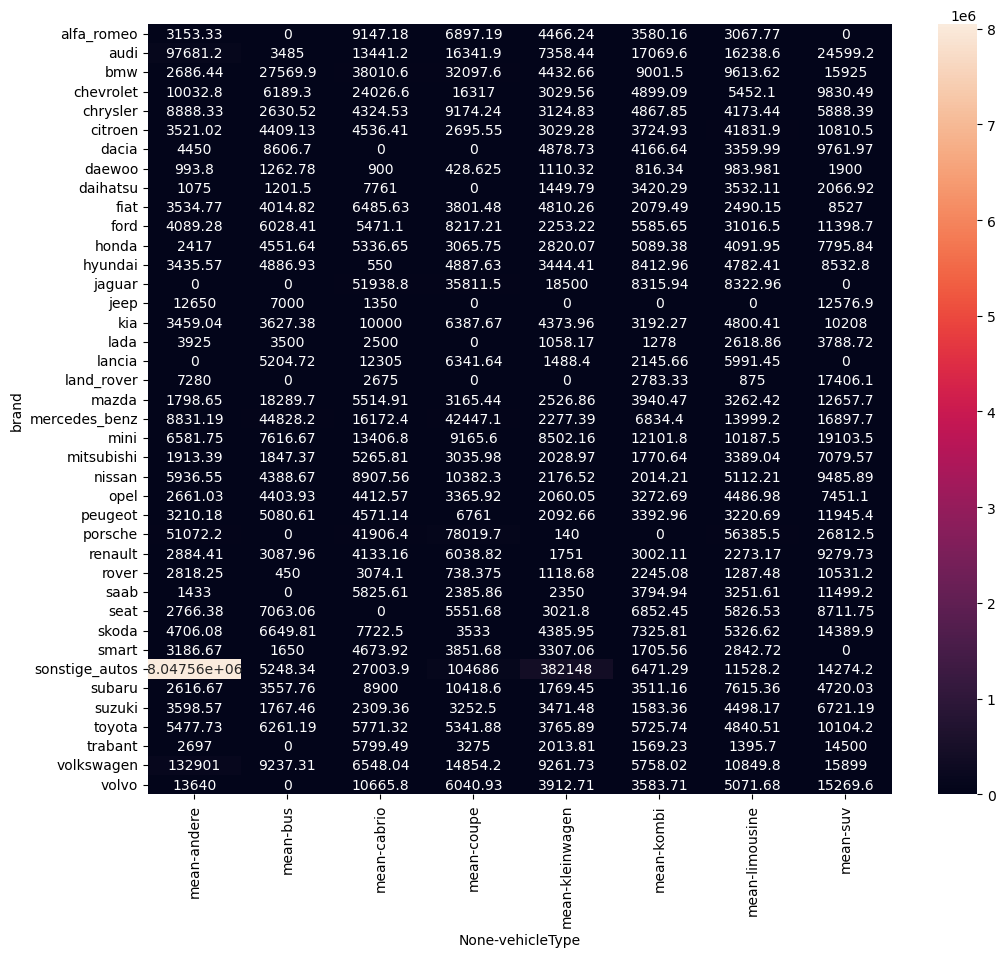

In [48]:
plt.figure(figsize=(12, 10))
sns.heatmap(data=average_price,annot=True,fmt=".6g")